In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import sympy as sp

# 参数设置
S0 = 1      # 初始资产价格
r = 0.06      # 风险无关利率
sigma = 0.2    # 波动率
dt = 0.01      # 时间步长
# N = int(T / dt)# 总步数
N = 1000 #SDE步数
g = 0

# 常用调整参数
l = 0.0125    #risk charge
T = 40        # 总时长（例如90年）
lamda = 1/35
M = 500  # MC计算的时候需要积分次数

# 计算 xi1 和 xi2
xi1 = (r - g - l + (sigma ** 2) / 2) / sigma
xi2 = (r - g - l - (sigma ** 2) / 2) / sigma

# 计算 E_lambda[V^g]
term1 = (lamda / (2 * (r - g + lamda))) * (1 - (xi2 / math.sqrt(xi2 ** 2 + 2 * (r - g + lamda))))
term2 = (lamda / (2 * (l + lamda))) * (1 - (xi1 / math.sqrt(xi1 ** 2 + 2 * (l + lamda))))

number_diff = term1 - term2

# 打印结果
print("number_diff =", number_diff)

# 定义积分函数
def integrand1(x, t, a1, b1):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2) * np.exp(a1 * t)

def integrand2(x, t, a2, b2):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2) * np.exp(a2 * t)

# 使用 spi.quad 进行数值积分
results = []
T_values = list(range(10, 1000))
for T_value in T_values:
    a1_value = g - r - lamda
    b1_value = (l + g - r + (sigma**2) / 2) / sigma
    a2_value = -(l + lamda)
    b2_value = (l + g - r - (sigma**2) / 2) / sigma

    result1, _ = spi.dblquad(integrand1, 0, T_value, lambda t: -np.inf, lambda t: b1_value * np.sqrt(t), args=(a1_value, b1_value))
    result2, _ = spi.dblquad(integrand2, 0, T_value, lambda t: -np.inf, lambda t: b2_value * np.sqrt(t), args=(a2_value, b2_value))
    result_diff = result1 - result2

    inf_diff = lamda * result_diff
    results.append(float(inf_diff))

    diff = float(inf_diff - number_diff)
    print(f"T = {T_value}: 积分结果{float(inf_diff)}; 差值{diff}")


number_diff = 0.028503542516268826
T = 10: 积分结果0.015571563242129877; 差值-0.012931979274138949
T = 11: 积分结果0.01672466976434207; 差值-0.011778872751926756
T = 12: 积分结果0.017783278470118267; 差值-0.01072026404615056
T = 13: 积分结果0.01875317803168802; 差值-0.009750364484580807
T = 14: 积分结果0.019640341072912; 差值-0.008863201443356825
T = 15: 积分结果0.020450720226844698; 差值-0.008052822289424128
T = 16: 积分结果0.021190116301498613; 差值-0.007313426214770213
T = 17: 积分结果0.021864095112044638; 差值-0.0066394474042241886
T = 18: 积分结果0.02247793753136185; 差值-0.006025604984906976
T = 19: 积分结果0.023036612354056123; 差值-0.005466930162212703
T = 20: 积分结果0.02354476484143122; 差值-0.004958777674837607
T = 21: 积分结果0.02400671599168011; 差值-0.004496826524588715
T = 22: 积分结果0.024426469053599652; 差值-0.004077073462669174
T = 23: 积分结果0.024807720820425417; 差值-0.003695821695843409
T = 24: 积分结果0.025153875952767583; 差值-0.0033496665635012433
T = 25: 积分结果0.02546806308451948; 差值-0.0030354794317493453
T = 26: 积分结果0.025753151825117636; 差值-0.00275

/home/hhf/Anaconda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hhf/Anaconda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hhf/Anaconda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hhf/Anaconda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


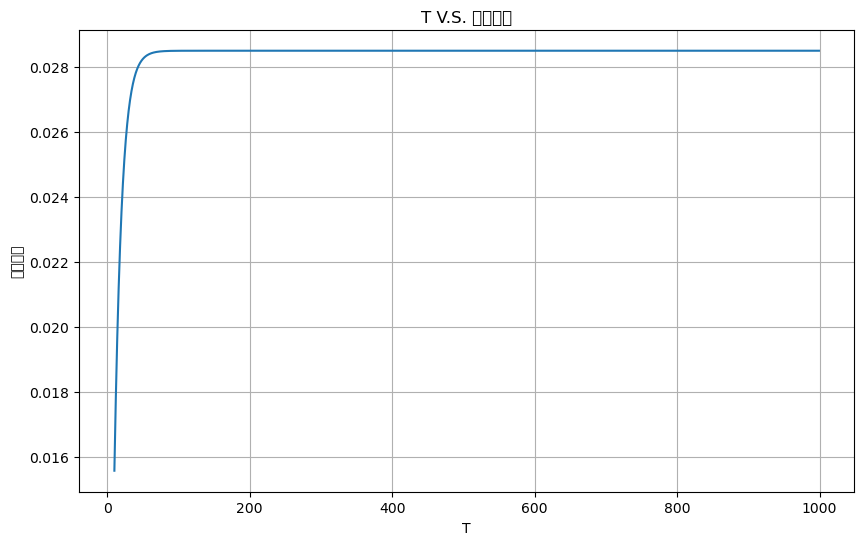

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(T_values, results)
plt.xlabel('T')
plt.ylabel('积分结果')
plt.title('T V.S. 积分结果')
plt.grid(True)
plt.show()
